<a href="https://colab.research.google.com/github/Kumarkashish511/UCS761_Deep_Learning/blob/main/Learning_to_Bend_A_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 STEP 1: DATASET 
X shape: (50, 1)
y shape: (50, 1)

 STEP 2: MODEL STRUCTURE 
Hidden Units: 3

 STEP 3: PARAMETER INITIALIZATION 
W1 shape: (1, 3)
b1 shape: (1, 3)
W2 shape: (3, 1)
b2 shape: (1, 1)

========== TRAINING ==========

Epoch 0000 | Loss: 0.216705
========== SAMPLE PREDICTIONS ==========
X: 0.00 | True: 0.0993 | Pred: 0.0000
X: 0.20 | True: 0.1581 | Pred: 0.0672
X: 0.41 | True: 0.4718 | Pred: 0.1343
X: 0.61 | True: 0.7822 | Pred: 0.2015
X: 0.82 | True: 0.5500 | Pred: 0.2686

Epoch 0100 | Loss: 0.082375
========== SAMPLE PREDICTIONS ==========
X: 0.00 | True: 0.0993 | Pred: 0.2725
X: 0.20 | True: 0.1581 | Pred: 0.3226
X: 0.41 | True: 0.4718 | Pred: 0.3727
X: 0.61 | True: 0.7822 | Pred: 0.4227
X: 0.82 | True: 0.5500 | Pred: 0.4728

Epoch 0200 | Loss: 0.061057
========== SAMPLE PREDICTIONS ==========
X: 0.00 | True: 0.0993 | Pred: 0.4239
X: 0.20 | True: 0.1581 | Pred: 0.4694
X: 0.41 | True: 0.4718 | Pred: 0.5148
X: 0.61 | True: 0.7822 | Pred: 0.5602
X: 0.82 | True: 0.5500 | P

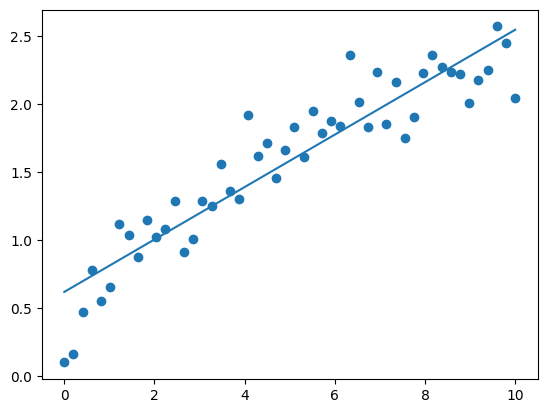

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

print("\n STEP 1: DATASET ")

X = np.linspace(0,10,50).reshape(-1,1)
noise = np.random.normal(0,0.2,size=(50,1))
y = np.log(X+1) + noise

print("X shape:",X.shape)
print("y shape:",y.shape)

print("\n STEP 2: MODEL STRUCTURE ")

hidden_units = 3
print("Hidden Units:",hidden_units)

print("\n STEP 3: PARAMETER INITIALIZATION ")

W1 = np.random.uniform(-1,1,size=(1,hidden_units))
b1 = np.zeros((1,hidden_units))

W2 = np.random.uniform(-1,1,size=(hidden_units,1))
b2 = np.zeros((1,1))

print("W1 shape:",W1.shape)
print("b1 shape:",b1.shape)
print("W2 shape:",W2.shape)
print("b2 shape:",b2.shape)

def activation(z):
    return np.maximum(0,z)

def activation_slope(z):
    return (z>0).astype(float)

print("\n========== TRAINING ==========")

learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):

    z1 = X @ W1 + b1
    h = activation(z1)
    y_hat = h @ W2 + b2

    error = y_hat - y
    loss = np.mean(error**2)

    dL_dy = 2 * error / len(X)

    dL_dW2 = h.T @ dL_dy
    dL_db2 = np.sum(dL_dy,axis=0,keepdims=True)

    dL_dh = dL_dy @ W2.T
    dL_dz1 = dL_dh * activation_slope(z1)

    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1,axis=0,keepdims=True)

    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    if epoch % 100 == 0:
        print(f"\nEpoch {epoch:04d} | Loss: {loss:.6f}")
        print("========== SAMPLE PREDICTIONS ==========")
        for i in range(5):
            print(f"X: {X[i][0]:.2f} | True: {y[i][0]:.4f} | Pred: {y_hat[i][0]:.4f}")

print("\n========== TRAINING COMPLETE ==========")
print("Final Loss:",loss)

z1 = X @ W1 + b1
h = activation(z1)
y_hat = h @ W2 + b2

print("\n========== FINAL SAMPLE PREDICTIONS ==========")
for i in range(5):
    print(f"X: {X[i][0]:.2f} | True: {y[i][0]:.4f} | Pred: {y_hat[i][0]:.4f}")

plt.scatter(X,y)
plt.plot(X,y_hat)
plt.show()